Go to directory ~/insarlab/Galapagos/GalapagosSenDT128/PYSAR
generate_mask.py waterMask.h5 -m 0.5 -x 0 300 -y 300 700 -o maskSantiago.h5
generate_mask.py waterMask.h5 -m 0.5 --roipoly -o maskFernandina.h5
generate_mask.py waterMask.h5 -m 0.5 --roipoly -o maskFernandina.h5image_math.py maskSantiago.h5 '*' 2 -o maskSantiago2.h5add.py waterMask.h5 maskFernandina.h5 maskSantiago2.h5 -o maskConnComp.h5


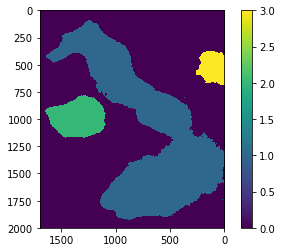

In [15]:
## Example for runing unwrap_error_bridging.py
## Manually Correct unwrapping errors in network of interferograms with Bridging

import os
import sys
import matplotlib.pyplot as plt
from pysar.utils import readfile, plot as pp

work_dir = '~/insarlab/Galapagos/GalapagosSenDT128/PYSAR'
os.chdir(os.path.expanduser(work_dir))
print('Go to directory '+work_dir)


##------------- Step 1. Generate Mask of Areas to be Connected ------------------##
## Use -x/y and -m/M option to generate mask
cmd = 'generate_mask.py waterMask.h5 -m 0.5 -x 0 300 -y 300 700 -o maskSantiago.h5'
print(cmd)
os.system(cmd)

## Use --roipoly option to interactively select polygon mask (for complex mask generation)
## Need to run the command in terminal for interative plotting
cmd = 'generate_mask.py waterMask.h5 -m 0.5 --roipoly -o maskFernandina.h5'
print(cmd)

## Sum up all individual masks into one label mask file - maskConnComp.h5
cmd += "image_math.py maskSantiago.h5 '*' 2 -o maskSantiago2.h5"
cmd += "add.py waterMask.h5 maskFernandina.h5 maskSantiago2.h5 -o maskConnComp.h5"
print(cmd)
os.system(cmd)

## It should looks like this
mask, atr = readfile.read('maskConnComp.h5')
fig, ax = plt.subplots()
im = ax.imshow(mask)
ax = pp.auto_flip_direction(atr, ax=ax, print_msg=False)
fig.colorbar(im, ax=ax)
plt.show()

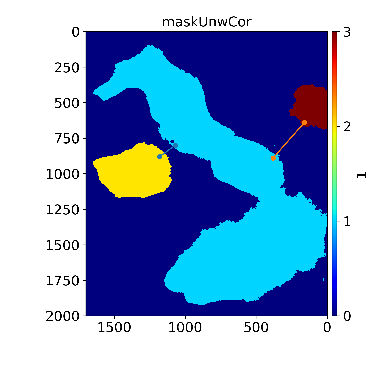

In [22]:
##------------- Step 2. Select Bridging Points  ------------------##
# plot the maskConnComp.h5 file, manually select points to connect each area one by one
# starting from the area where the reference pixel is
# it should looks like plot as below:

import matplotlib.image as mpimg
img = mpimg.imread('PIC/maskConnCompBridge.png')
fig, ax = plt.subplots(figsize=[6,8])
ax.imshow(img)
ax.axis('off')
plt.show()

# write down the coordinates of the selected points into template file pysar.unwrapError.bridgeYX option
# as shown in the example here: part of pysarApp_template.txt file

TEMPLATE = """## 1.4 Unwrapping Error Correction (optional)
pysar.unwrapError.method   = bridging        #[bridging / phase_closure / no], auto for no
pysar.unwrapError.maskFile = maskConnComp.h5 #[file name / no], auto for no
pysar.unwrapError.ramp     = no              #[plane / quadratic], auto for plane
pysar.unwrapError.bridgeYX = 800,1070,880,1180; 890,380,640,160   #[y1_start, x1_start, y1_end, x1_end; ...], 
"""

In [23]:
##------------- Step 3. Run unwrap_error_bridging.py  ------------------##
cmd = 'unwrap_error_bridging.py INPUTS/ifgramStack.h5 -t pysarApp_template.txt'
print(cmd)
os.system(cmd)

unwrap_error_bridging.py INPUTS/ifgramStack.h5 -t pysarApp_template.txt


0